**Convolutional Neural Network (CNN)**
**Image Classification with CIFAR-10 Dataset.**
Task 1.


Step 1. *Import necessary libraries and load the dataset.*

In [1]:
#libraries
from tensorflow.keras.datasets import cifar10
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0

#loading data from cifar-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

CIFAR-10 consists of 60000 RGB color images of 32x32 pixels and 10 classes. There are 6000 images per class, 5000 of which belong to the training set and 1000 to the test set.

In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_test.shape

(10000, 1)

In [6]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
def show_image(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(labels[y[index]])

TypeError: ignored

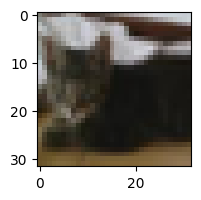

In [ ]:
show_image(x_train, y_train, 9)

In [8]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

Step 3. *Preprocessing*

In [9]:
x_train=x_train/255
y_test = y_test/255

In [10]:
#one-hot_encoding
y_train_one_hot = to_categorical(y_train, num_classes = 10)
y_test_one_hot = to_categorical(y_test, num_classes = 10)

Data augmentation

In [11]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

**Model**.
Applied Sequential model, which is a convenient and simple way to build neural networks. It is widely used for image classification tasks, here a linear stack of layers is sufficient.

In [12]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  #reshapes the input data from (32, 32, 3) to a flat vector of size 32 x 32 x 3 = 3072 before feeding it to the first layer.
    Dense(128, activation='relu'), #first dense layer with 128 neurons using ReLU activation function
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') #softmax activation function for multi-class classification problems
]) #a simple neural network using the Keras Sequential API

In [13]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) #configuring the model for training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=32), epochs=50, validation_data=(x_test, y_test_one_hot), callbacks=[early_stopping]) #train with data augm.

Epoch 1/50
1563/1563 [==============================] - 51s 29ms/step - loss: 1.9057 - accuracy: 0.3152 - val_loss: 63.3113 - val_accuracy: 0.7686
Epoch 2/50
1563/1563 [==============================] - 48s 30ms/step - loss: 1.8150 - accuracy: 0.3478 - val_loss: 158.3584 - val_accuracy: 0.4879
Epoch 3/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.7587 - accuracy: 0.3672 - val_loss: 63.7592 - val_accuracy: 0.7073
Epoch 4/50
1563/1563 [==============================] - 46s 30ms/step - loss: 1.7332 - accuracy: 0.3786 - val_loss: 821.9136 - val_accuracy: 0.0069


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402762 (1.54 MB)
Trainable params: 402506 (1.54 MB)
Non-trainable params: 256 (1.00 KB)
____________________

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 63.3113 - accuracy: 0.7686
Test Loss: 63.31129837036133
Test Accuracy: 0.7685999870300293


**EfficientNet Model.**


In [16]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=32), epochs=50, validation_data=(x_test, y_test_one_hot), callbacks=[early_stopping])



16705208/16705208 [==============================] - 2s 0us/step
Epoch 1/50
1563/1563 [==============================] - 148s 89ms/step - loss: 2.3044 - accuracy: 0.1001 - val_loss: 2.3085 - val_accuracy: 0.0855
Epoch 2/50
1563/1563 [==============================] - 137s 88ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3227 - val_accuracy: 0.0405
Epoch 3/50
 775/1563 [=============>................] - ETA: 1:03 - loss: 2.3028 - accuracy: 0.0970

KeyboardInterrupt: ignored